# Zadanie 3, Lista 4

In [1]:
import sys, os, import_ipynb
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
import Moduly.poprawnoscGrupowania as pg
import Moduly.Kmeans as km

importing Jupyter notebook from /home/i309016/Zajecia/Semestr3/ED/Moduly/poprawnoscGrupowania.ipynb
importing Jupyter notebook from /home/i309016/Zajecia/Semestr3/ED/Moduly/Kmeans.ipynb


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans, Birch, DBSCAN
import rasterio

In [3]:
import time

In [4]:
obraz=rasterio.open("/pio/scratch/2/ED2015/APEX/APEX_OSD_Package_1.0/APEX_OSD_Package_1.0/APEX_OSD_V1_calibr_cube")

/home/i309016/.local/lib/python3.5/site-packages/rasterio/__init__.py:219: NotGeoreferencedWarning: Dataset has no geotransform set. The identity matrix may be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


In [5]:
dir(obraz)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__pyx_vtable__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_block_shapes',
 '_closed',
 '_count',
 '_crs',
 '_crs_wkt',
 '_descriptions',
 '_dtypes',
 '_env',
 '_gcps',
 '_get_crs',
 '_handle_crswkt',
 '_has_band',
 '_mask_flags',
 '_nodatavals',
 '_offsets',
 '_read',
 '_scales',
 '_set_all_descriptions',
 '_set_all_offsets',
 '_set_all_scales',
 '_set_all_units',
 '_set_attrs_from_dataset_handle',
 '_set_crs',
 '_set_gcps',
 '_set_nodatavals',
 '_transform',
 '_units',
 'block_shapes',
 'block_size',
 'block_window',
 'block_windows',
 'bounds',
 'checksum',
 'close',
 'closed',
 'colorinterp',
 'colormap',
 'compression',
 'count',
 'c

In [6]:
obraz.bounds

BoundingBox(left=0.0, bottom=1500.0, right=1000.0, top=0.0)

In [7]:
d=obraz.count

W=obraz.width

H=obraz.height

In [8]:
obraz.descriptions

('band 1 (0.413100 Micrometers)',
 'band 2 (0.426500 Micrometers)',
 'band 3 (0.439000 Micrometers)',
 'band 4 (0.450400 Micrometers)',
 'band 5 (0.461100 Micrometers)',
 'band 6 (0.470700 Micrometers)',
 'band 7 (0.480000 Micrometers)',
 'band 8 (0.489500 Micrometers)',
 'band 9 (0.498900 Micrometers)',
 'band 10 (0.508400 Micrometers)',
 'band 11 (0.517100 Micrometers)',
 'band 12 (0.524900 Micrometers)',
 'band 13 (0.532300 Micrometers)',
 'band 14 (0.539200 Micrometers)',
 'band 15 (0.545700 Micrometers)',
 'band 16 (0.551500 Micrometers)',
 'band 17 (0.556700 Micrometers)',
 'band 18 (0.562000 Micrometers)',
 'band 19 (0.567500 Micrometers)',
 'band 20 (0.572200 Micrometers)',
 'band 21 (0.576100 Micrometers)',
 'band 22 (0.580000 Micrometers)',
 'band 23 (0.584100 Micrometers)',
 'band 24 (0.588300 Micrometers)',
 'band 25 (0.592500 Micrometers)',
 'band 26 (0.596900 Micrometers)',
 'band 27 (0.601300 Micrometers)',
 'band 28 (0.605900 Micrometers)',
 'band 29 (0.610600 Micromete

In [9]:
tabObraz=obraz.read()

In [10]:
np.shape(tabObraz)

(285, 1500, 1000)

In [11]:
daneObrazu=np.reshape(tabObraz,(d,W*H))

In [12]:
daneObrazu

array([[ 28,  62,  21, ...,  84, 109,  95],
       [ 40,  27,  22, ..., 124, 157, 139],
       [ 53,  35,  23, ..., 153, 188, 169],
       ...,
       [  0,   0,   0, ..., 288, 270, 270],
       [  0,   0,   0, ..., 263, 254, 254],
       [  0,   0,   0, ..., 255, 244, 244]], dtype=int16)

In [13]:
t=time.time()
(centra,przynaleznosc)=km.kMeans(np.array(daneObrazu,dtype=np.float64),5,iteracje=100,dtype=np.float64)
print(time.time()-t)

231.29761171340942


In [14]:
centra

array([[ 106.33277476,  129.60044002,   94.92884152,  381.4513192 ,
         506.2442267 ],
       [ 128.71946707,  141.29003894,  123.82251574,  485.81499302,
         596.68270806],
       [ 165.05579269,  177.12794236,  158.46547014,  590.45703821,
         712.42078189],
       ...,
       [ 469.0060525 ,  526.94144093,  282.1229034 , 1103.66904717,
        2353.19312597],
       [ 448.94844103,  501.40068772,  272.72929856, 1082.68784879,
        2318.651724  ],
       [ 360.65564051,  385.225884  ,  223.038645  , 1010.42154301,
        2244.95108674]])

In [15]:
przynaleznosc=pg.zamienTablicePrzynaleznosci2DNa1D(przynaleznosc)

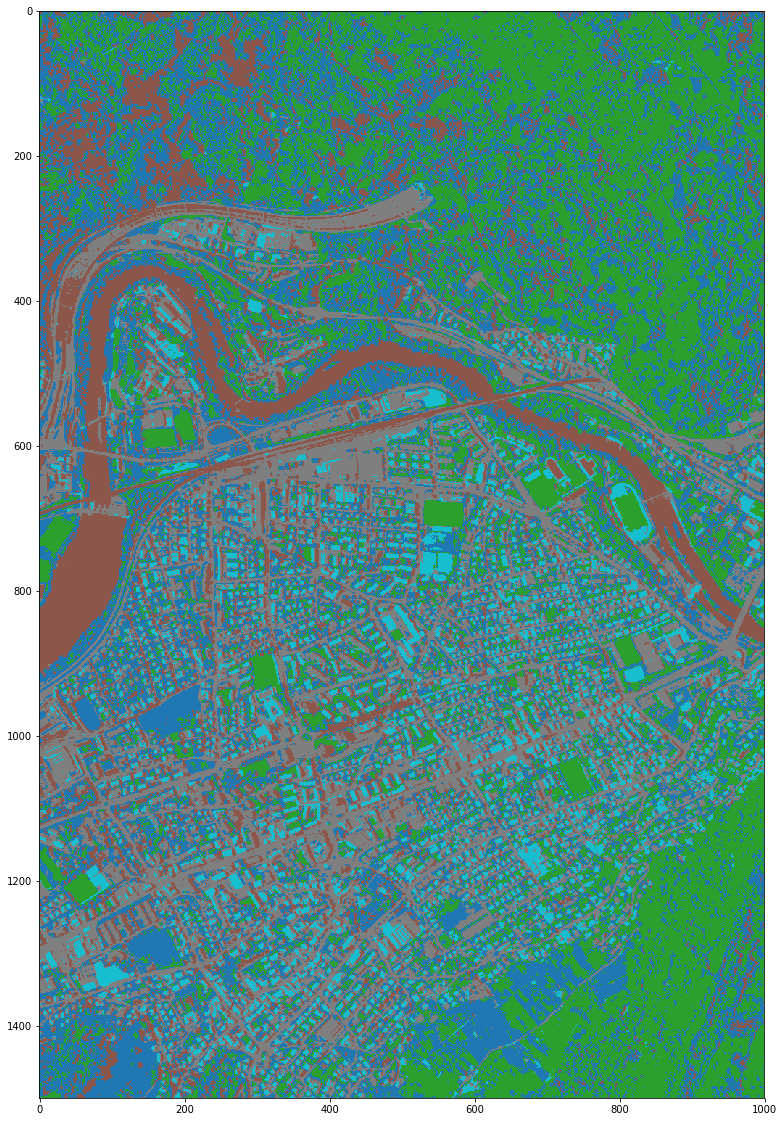

In [16]:
plt.gcf().set_size_inches(20,20)
plt.imshow(przynaleznosc.reshape(H,W),cmap='tab10')
plt.savefig("k-means-5k")

# Mini batch k-means

In [13]:
t=time.time()
mini_batch_k_means = MiniBatchKMeans(init='k-means++', n_clusters=8, max_iter=50, batch_size=500000, n_init=4, max_no_improvement=10, verbose=0, random_state=0)
mini_batch_k_means.fit(daneObrazu.T)
print(time.time()-t)

101.16372680664062


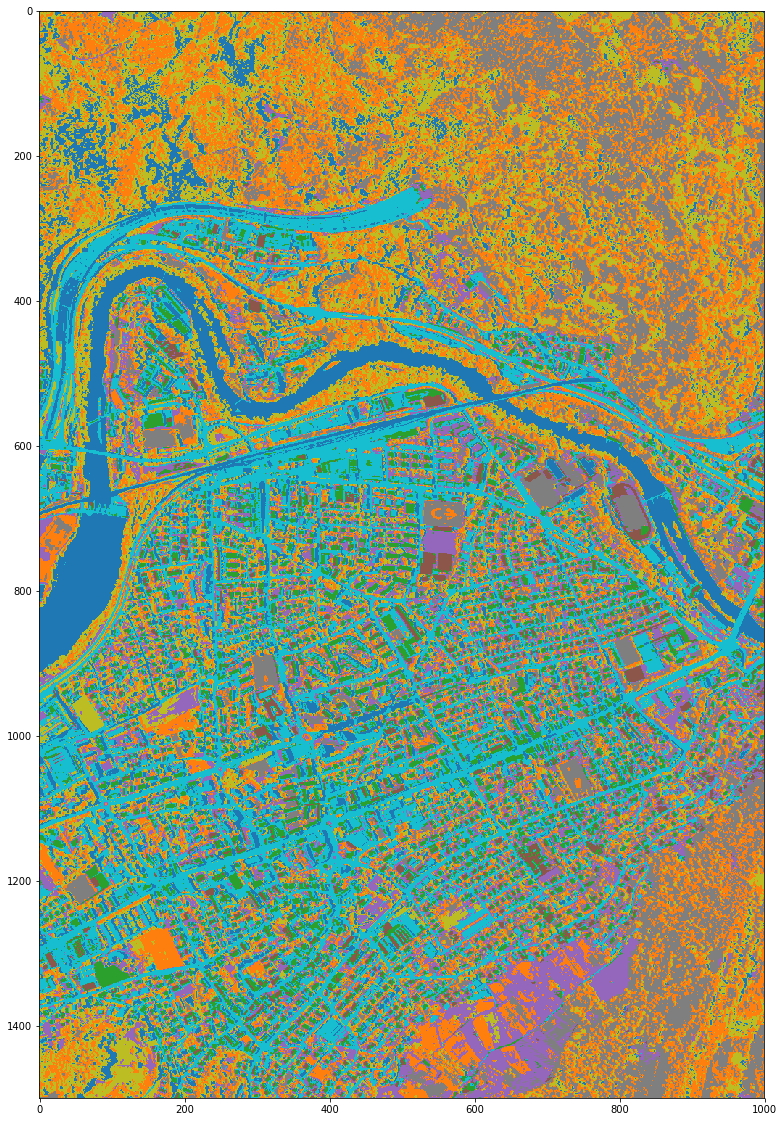

In [14]:
plt.gcf().set_size_inches(20,20)
plt.imshow(mini_batch_k_means.labels_.reshape(H,W),cmap="tab10")
plt.savefig("mimi-k-means-8")

# Dbscan

In [36]:
t=time.time()
dbscan = DBSCAN(eps=350, min_samples=10,n_jobs=-1)
dbscan.fit(daneObrazu.T)
print(time.time()-t)

559.6863617897034


In [37]:
np.shape(np.unique(dbscan.labels_))

(373,)

In [38]:
dbscan.labels_

array([-1, -1, -1, ..., -1, -1, -1])

powinno być między 500-1000
min_samples=10

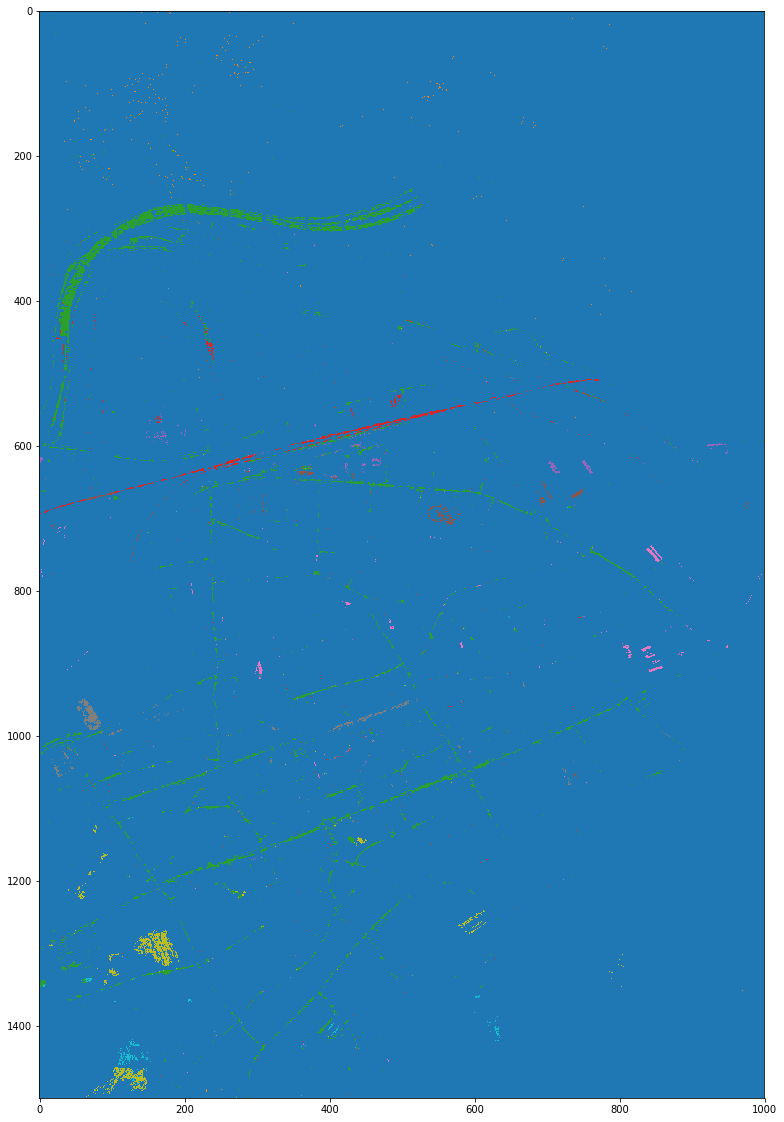

In [39]:
plt.gcf().set_size_inches(20,20)
plt.imshow(dbscan.labels_.reshape(H,W),cmap="tab10")
plt.savefig("dbscan-300-10")